In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Task 1

In [2]:
data_2d = pd.read_csv("data/data_2d.csv")
mnist = pd.read_csv("data/mnist.csv")

In [6]:
data_2d.head(2)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430


In [7]:
mnist.head(2)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
K = range(1, 8)

In [10]:
def k_means(frame):
    distortions = []
    for k in K:
        k_meanModel = KMeans(n_clusters=k, n_init='auto')
        k_meanModel.fit(frame)
        distortions.append(k_meanModel.inertia_)

    return distortions

In [11]:
def show_k(distortions):
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

#### Ліктєвий медот для data_2d

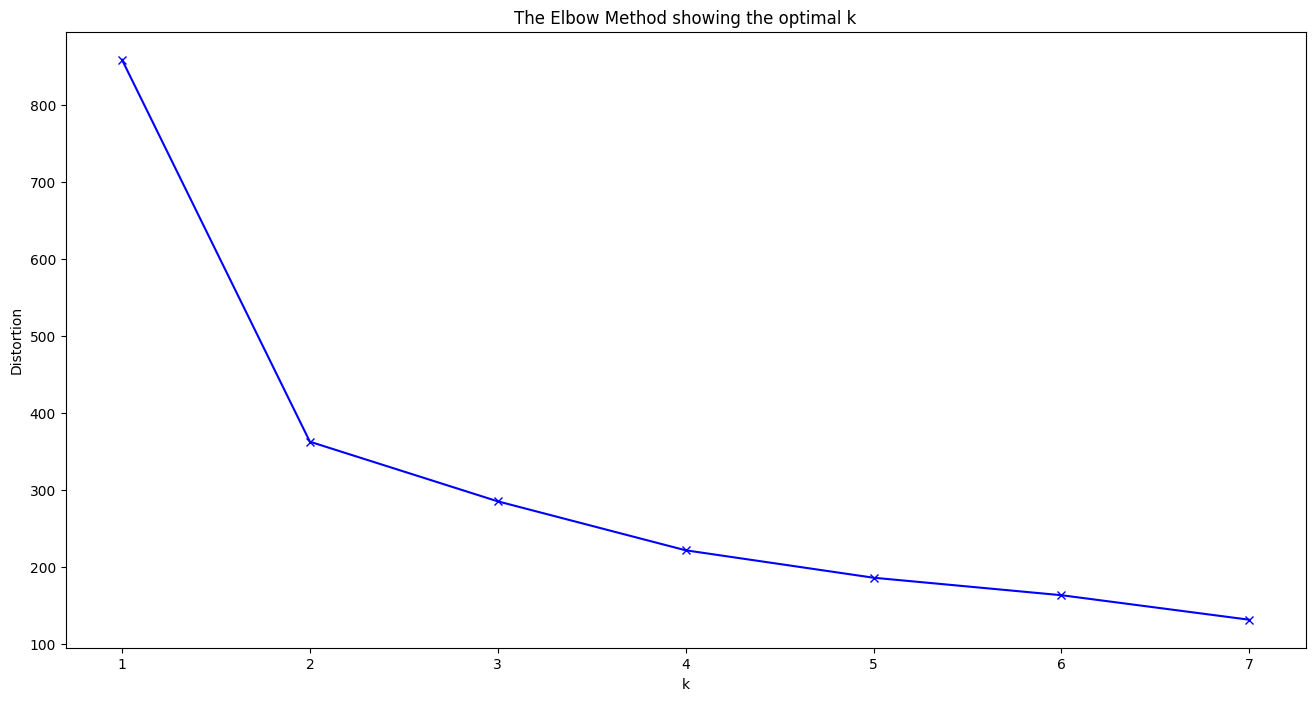

In [12]:
show_k(k_means(data_2d))

#### Ліктєвий медот для mnist

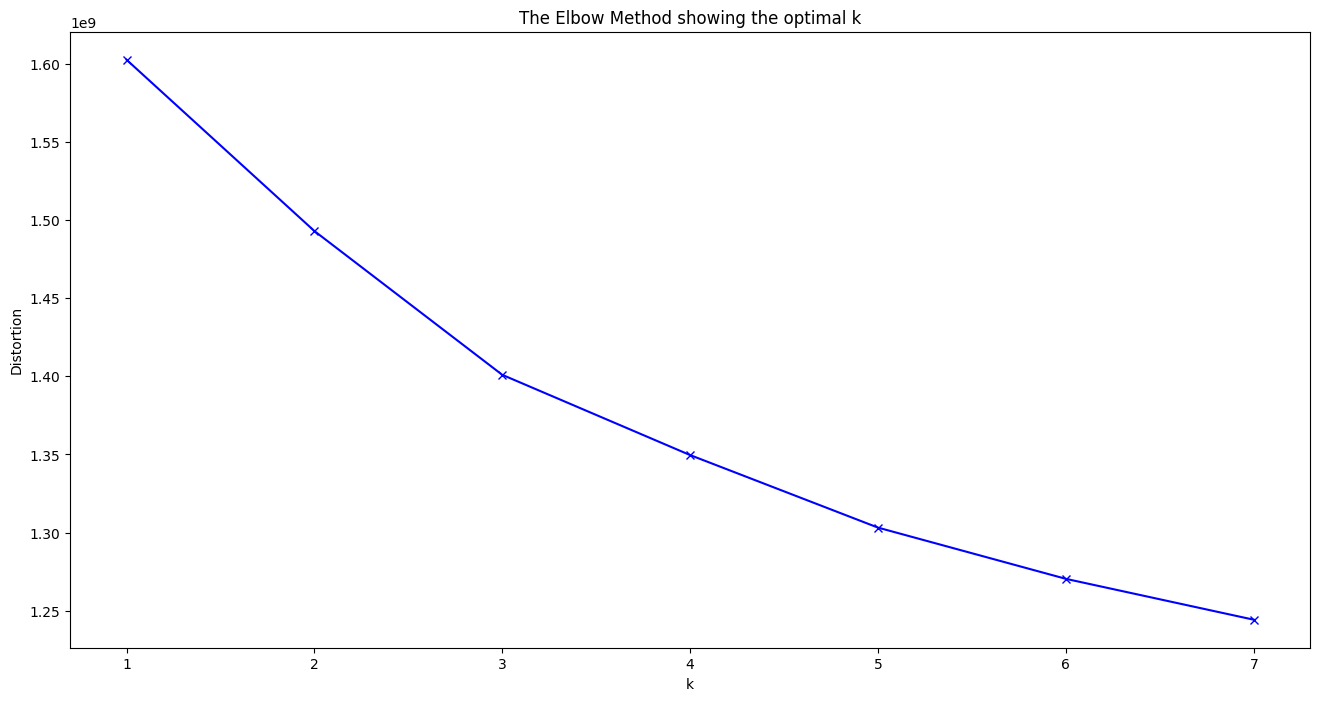

In [14]:
show_k(k_means(mnist))

### Task 2

##### Зменшення розмірності даних до 2-вимірного варіанту

In [16]:
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist)

##### Візуалізація

In [21]:
def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)
    
    plt.figure(figsize=(16,8))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

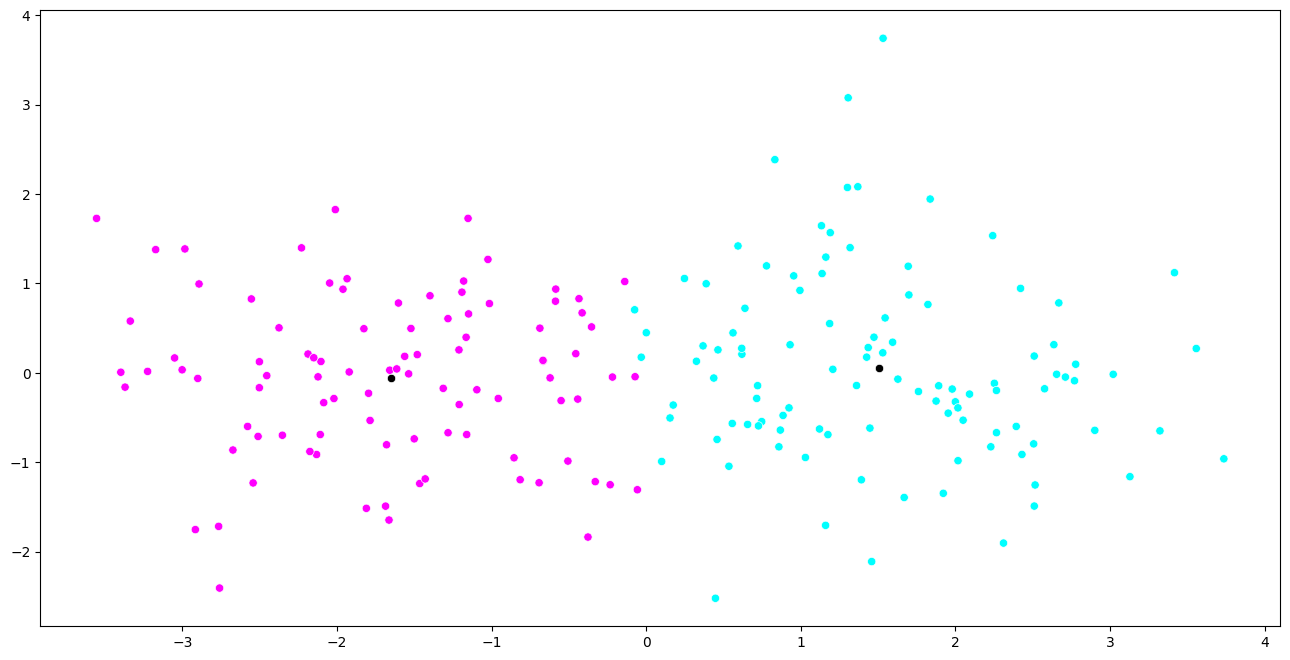

In [22]:
show_clustering(pca.fit_transform(data_2d), 2)

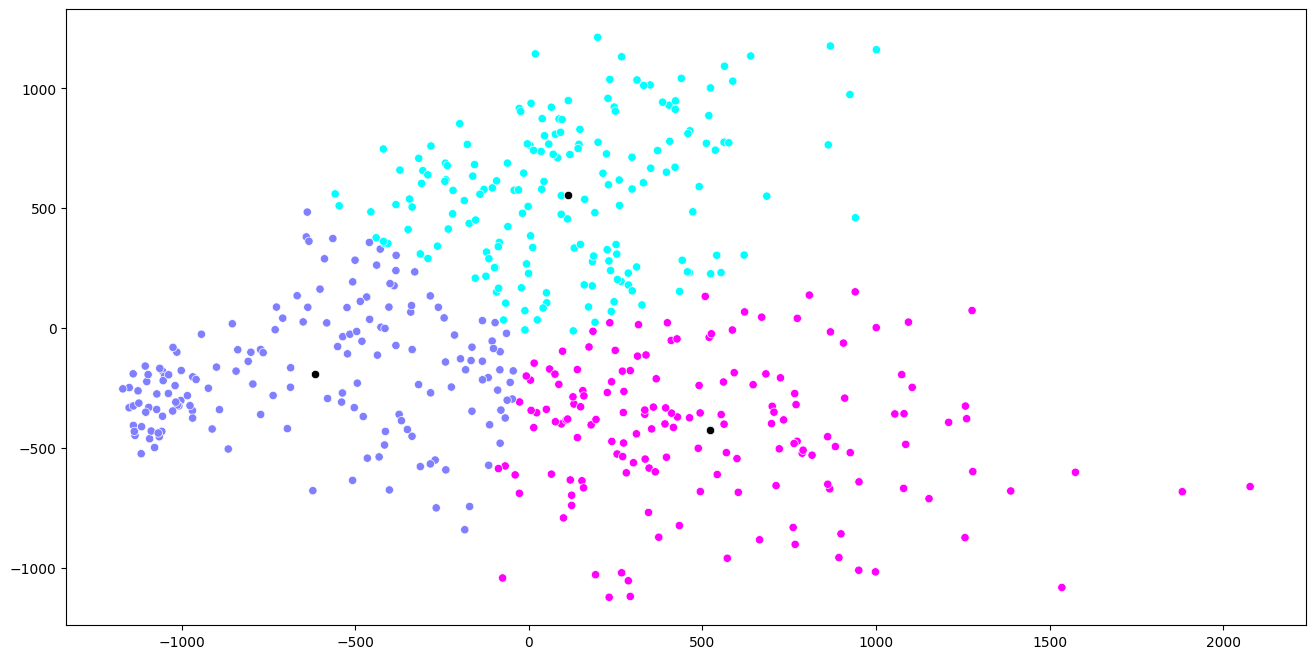

In [23]:
show_clustering(mnist_2d, 3)